# Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [4]:
data.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
#Features (X) and target variable()

x = data.drop("MEDV", axis=1)
y = data['MEDV']

In [8]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=100)

In [9]:
#Apply data scalling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#create a decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)

#Fit the regrssor on the training data
regressor.fit(x_train_scaled, y_train)

#Make predictions on the test set
y_pred = regressor.predict(x_test_scaled)

In [10]:
#calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse  = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#print the metrics
print("Training Accuracy:", regressor.score(x_train_scaled, y_train))
print("Testing Accuracy:", regressor.score(x_test_scaled, y_test))
print("Mean Absolute erroe:", mae)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R2 Score:",r2)

Training Accuracy: 1.0
Testing Accuracy: 0.8266004665763241
Mean Absolute erroe: 3.101960784313726
Mean squared error: 16.749411764705883
Root mean squared error: 4.092604520926238
R2 Score: 0.8266004665763241


In [11]:
#Apply data scalling uisng StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#perform k-folds cross-validation 
k_folds = 5

#calculate the MSE using Cross-validation
mse_scores = cross_val_score(regressor, x_scaled, y, scoring='neg_mean_squared_error', cv=k_folds)

#Note: cross-validationo returns negative MSE, so we'll take the mse score
mse_scores = -mse_scores

#calculate the mean and standard deviation of the MSE
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

#calculate the root mean sqaured error
rmse = np.sqrt(mean_mse)

print(f'cross-Validation MSE scores: {mse_scores}')
print(f'Mean MSE: {mean_mse:.2f}')
print(f'Standard Deviation of MSE: {std_mse:.2f}')
print(f'Root mean sqaured error: {rmse:.2f}')

cross-Validation MSE scores: [12.77862745 36.44980198 31.56643564 54.16811881 56.96009901]
Mean MSE: 38.38
Standard Deviation of MSE: 16.12
Root mean sqaured error: 6.20


These metrics give you a comprehensive view of how well your Decision Tree Regressor is performing and the level of variability in its predictions across different folds. A lower MSE and RMSE indicate better model performance, while a higher standard deviation suggests greater variability in predictions.

## Hypermeter tuning using Grid Search CV

In [14]:
# Define hyperparameter search spaces
param_grid = {
    'max_depth': [None, 5, 10, 15,20,30,40,50],  # Adjust depth values as needed
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50],  # Adjust min_samples_split values as needed
    'min_samples_leaf': [1, 2, 4, 8, 10],  # Adjust min_samples_leaf values as needed
}

# Perform Grid Search CV
grid_search = GridSearchCV(estimator=regressor,
                           param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters from Grid Search
best_params_grid = grid_search.best_params_

# Create a new Decision Tree Regressor with the best hyperparameters from Grid Search
best_regressor_grid = DecisionTreeRegressor(**best_params_grid, random_state=42)
best_regressor_grid.fit(x_train_scaled, y_train)
y_pred_grid = best_regressor_grid.predict(x_test_scaled)
mse_grid = mean_squared_error(y_test, y_pred_grid)

print("Grid Search Results:")
print(f"Best Hyperparameters: {best_params_grid}")
print(f"Mean Squared Error (Best Model): {mse_grid}")

Grid Search Results:
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mean Squared Error (Best Model): 22.820558794570147


## Hypermeter tuning using Random Search CV

In [15]:
# Define hyperparameter search spaces for Randomized Search
param_dist = {
    'max_depth': [None] + list(np.arange(1, 21)),  # Adjust depth values as needed
    'min_samples_split': list(np.arange(2, 21)),  # Adjust min_samples_split values as needed
    'min_samples_leaf': list(np.arange(1, 21)),  # Adjust min_samples_leaf values as needed
}

# Perform Randomized Search CV
randomized_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
randomized_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters from Randomized Search
best_params_random = randomized_search.best_params_

# Create a new Decision Tree Regressor with the best hyperparameters from Randomized Search
best_regressor_random = DecisionTreeRegressor(**best_params_random, random_state=42)
best_regressor_random.fit(x_train_scaled, y_train)
y_pred_random = best_regressor_random.predict(x_test_scaled)
mse_random = mean_squared_error(y_test, y_pred_random)

print("\nRandomized Search Results:")
print(f"Best Hyperparameters: {best_params_random}")
print(f"Mean Squared Error (Best Model): {mse_random}")


Randomized Search Results:
Best Hyperparameters: {'min_samples_split': 13, 'min_samples_leaf': 1, 'max_depth': 18}
Mean Squared Error (Best Model): 25.28924776495975


## Plotting a Decision Tree

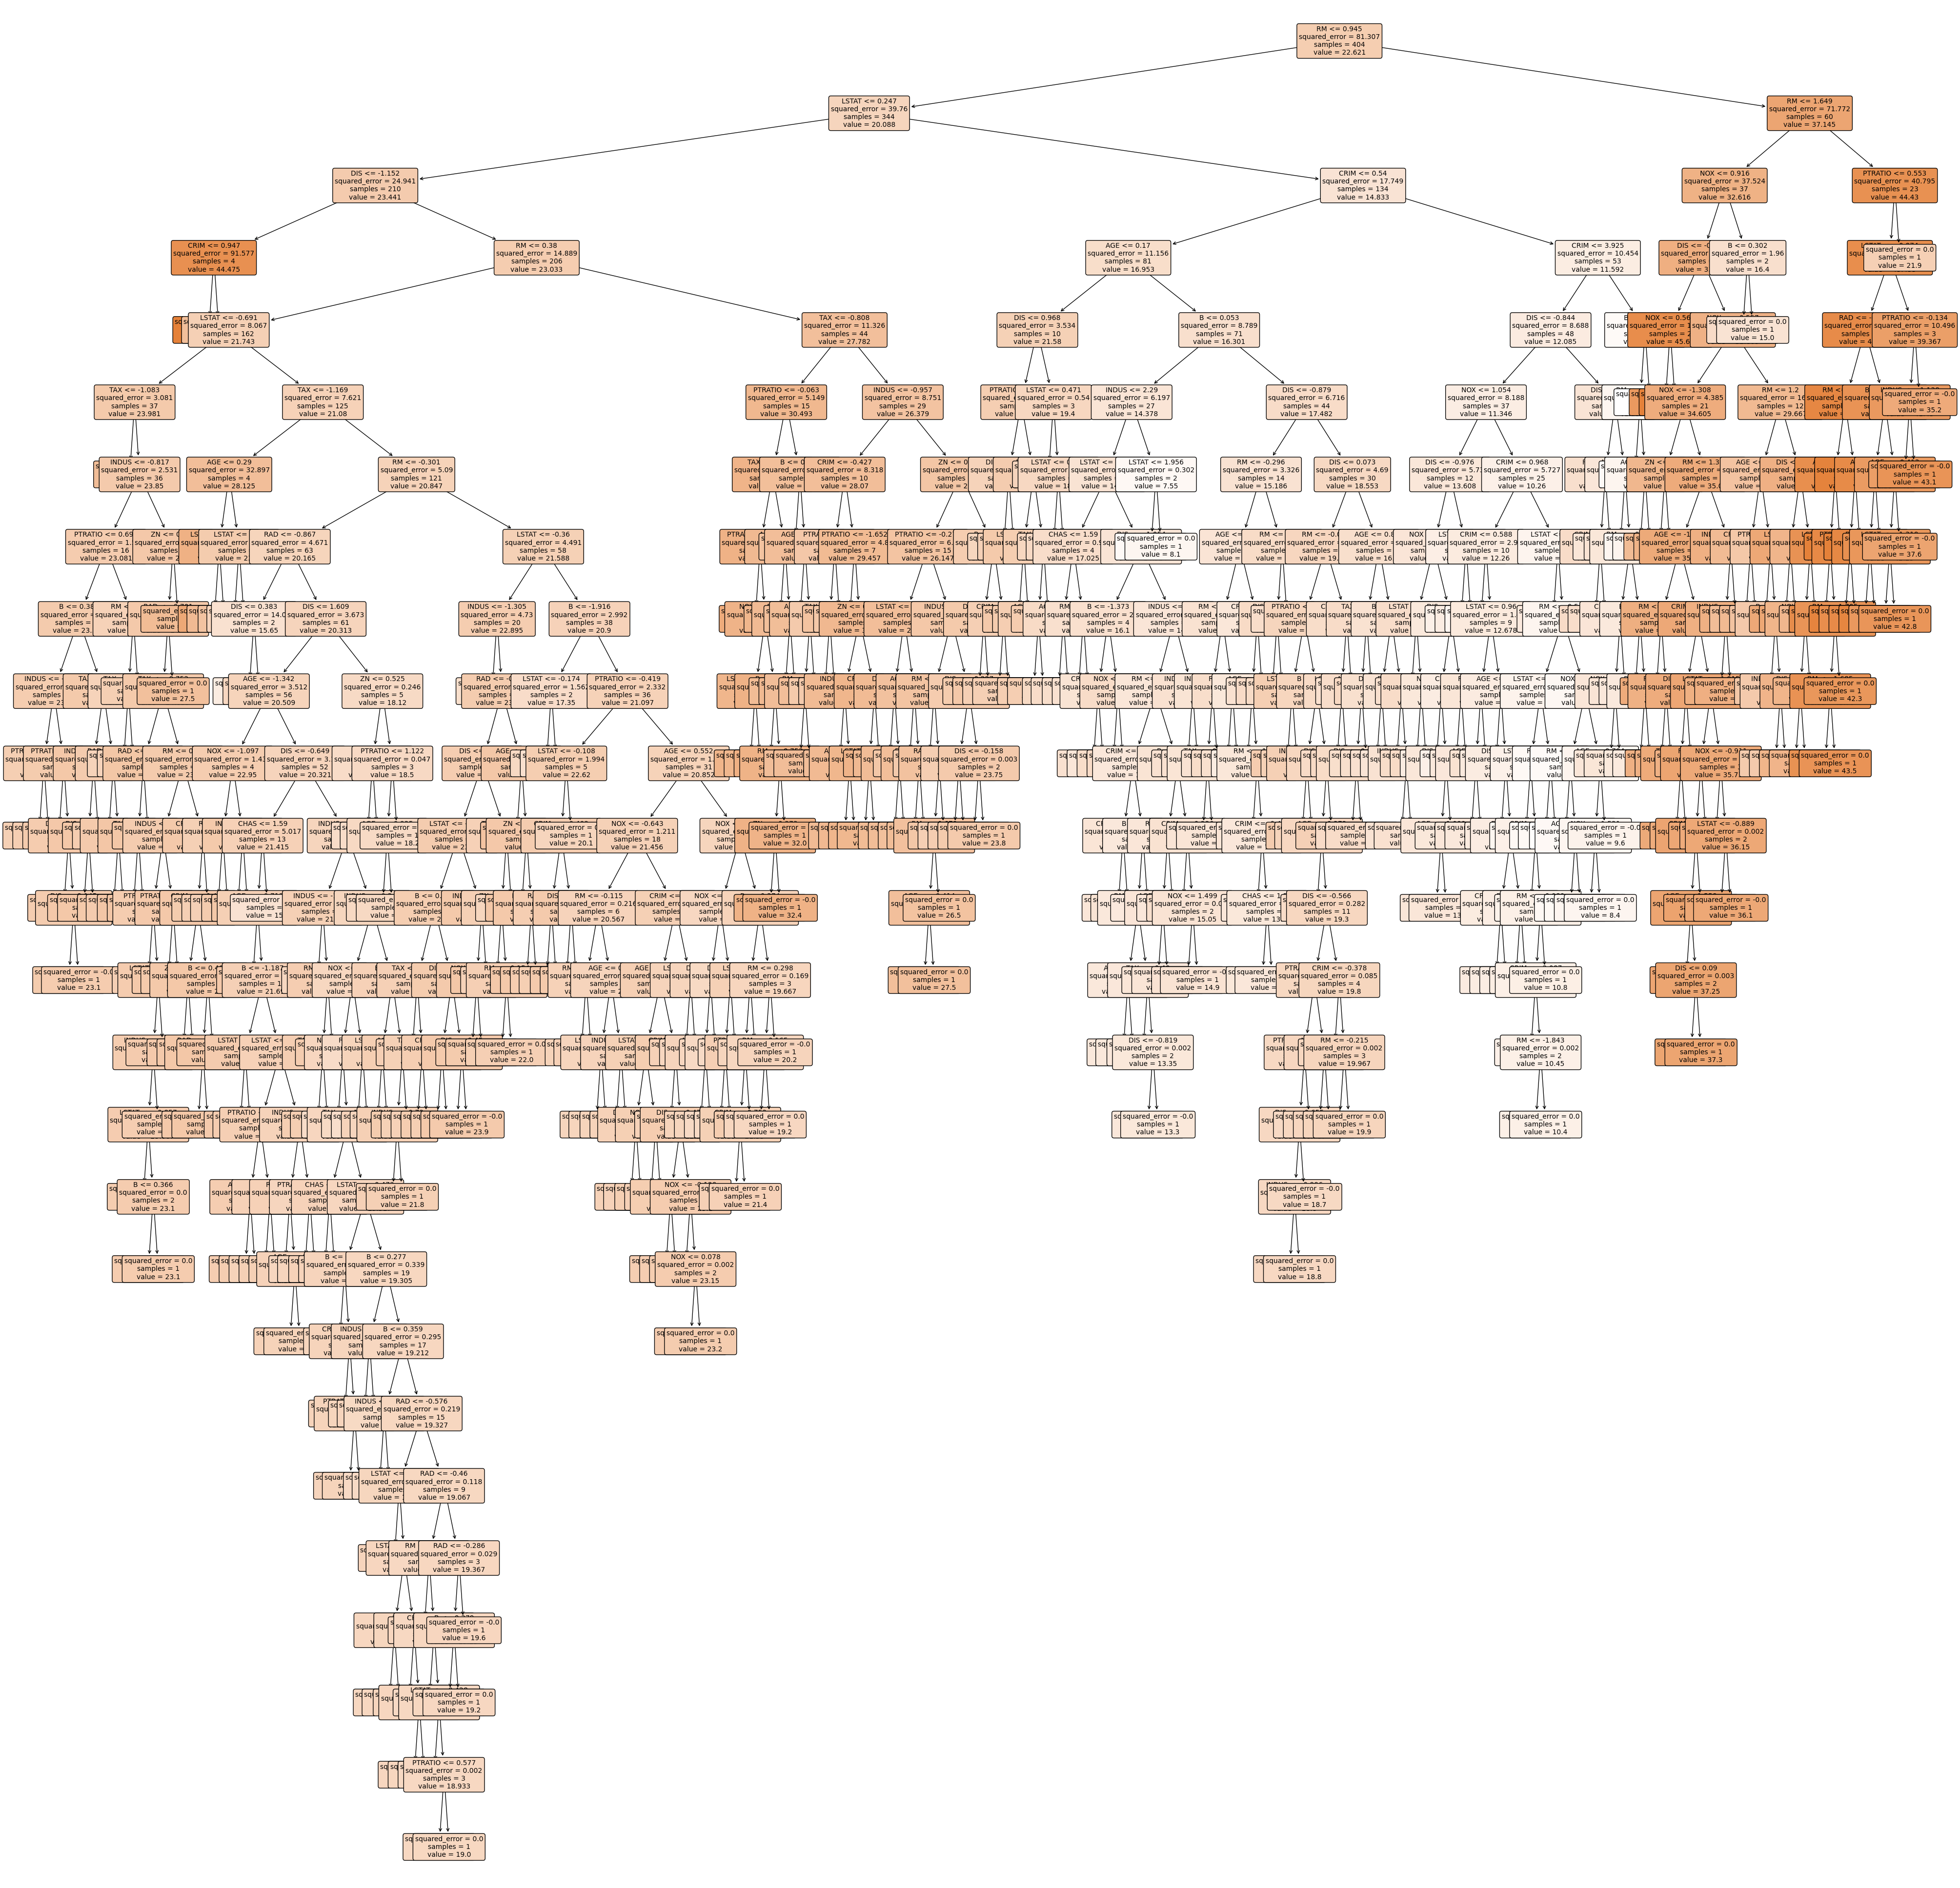

In [21]:
# Plot the decision tree with improved readability
plt.figure(figsize=(50,50))  # Adjust the figure size as needed
plot_tree(
    regressor,
    filled=True,
    feature_names=x.columns.tolist(),
    rounded=True,
    fontsize=10,
    precision=3,
)
plt.show()

Feature Importances:
    Feature  Importance
5        RM    0.562417
12    LSTAT    0.202149
7       DIS    0.078606
0      CRIM    0.048081
4       NOX    0.030231
10  PTRATIO    0.022831
6       AGE    0.015781
9       TAX    0.012958
11        B    0.010215
2     INDUS    0.008977
8       RAD    0.004412
1        ZN    0.002023
3      CHAS    0.001319


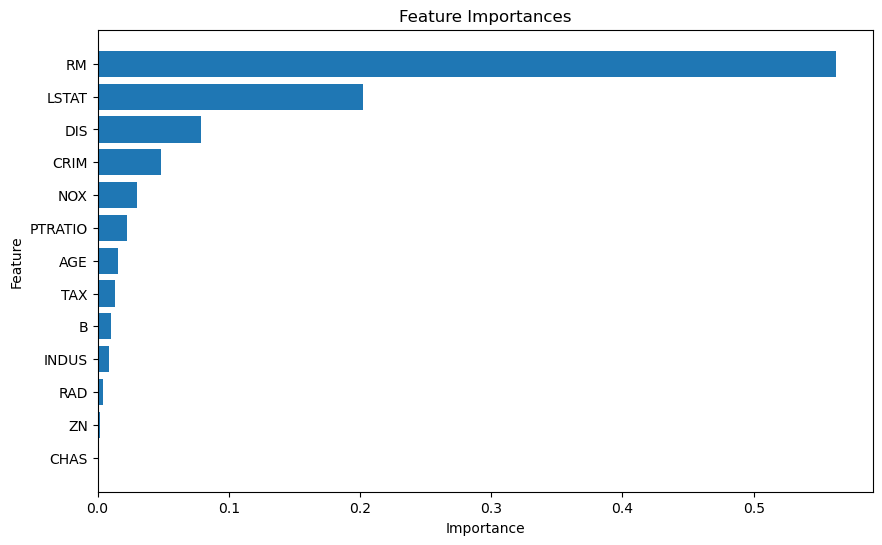

In [23]:
# Get feature importances
feature_importances = regressor.feature_importances_

# Print feature importances
feature_names = x.columns.tolist()

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()